In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
univ = pd.read_csv('../datasets/Universities.csv', index_col='Univ')
univ.head(3)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Univ,,,,,,
Brown,1310,89,22,13,22704,94
CalTech,1415,100,25,6,63575,81
CMU,1260,62,59,9,25026,72


In [7]:
#univ.info()

### Standardize the data

In [4]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(univ)
#scaled_data

### How to build model

In [9]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=2)

In [11]:
model.fit(scaled_data)

KMeans(n_clusters=2)

In [12]:
# The WCSS value for the model
model.inertia_

64.14528395010268

### Hyperparam tuning

In [14]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [15]:
wcss

[150.0,
 64.14528395010268,
 44.531761731450956,
 33.654341806512235,
 27.932875789090364,
 22.672206496052254,
 18.750021301705342,
 16.006573668895065,
 13.22674477227347,
 10.959526184170148]

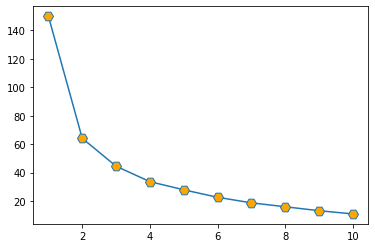

In [19]:
### Elbow Plot
plt.plot(range(1,11),wcss, marker='H', markersize=10, markerfacecolor='orange')
plt.show()

In [20]:
final_model = KMeans(n_clusters=3)

In [21]:
final_model.fit(scaled_data)

KMeans(n_clusters=3)

In [22]:
final_model.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0], dtype=int32)

In [23]:
univ['Label'] = final_model.labels_

In [24]:
univ

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Label
Univ,,,,,,,
Brown,1310,89,22,13,22704,94,1
CalTech,1415,100,25,6,63575,81,0
CMU,1260,62,59,9,25026,72,1
Columbia,1310,76,24,12,31510,88,1
Cornell,1280,83,33,13,21864,90,1
Dartmouth,1340,89,23,10,32162,95,0
Duke,1315,90,30,12,31585,95,0
Georgetown,1255,74,24,12,20126,92,1
Harvard,1400,91,14,11,39525,97,0


In [25]:
grp = univ.groupby('Label')

In [27]:
for x,y in grp:
    print(y)
    print('_'*70)

               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Label
Univ                                                                 
CalTech       1415    100      25        6     63575        81      0
Dartmouth     1340     89      23       10     32162        95      0
Duke          1315     90      30       12     31585        95      0
Harvard       1400     91      14       11     39525        97      0
JohnsHopkins  1305     75      44        7     58691        87      0
MIT           1380     94      30       10     34870        91      0
Princeton     1375     91      14        8     30220        95      0
Stanford      1360     90      20       12     36450        93      0
Yale          1375     95      19       11     43514        96      0
______________________________________________________________________
               SAT  Top10  Accept  SFRatio  Expenses  GradRate  Label
Univ                                                                 
Brown         1310 

In [28]:
grp.agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Label,,,,,,
0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
